In [12]:
import os
import numpy as np
import pandas as pd
import requests
import tqdm.notebook
from loaders import load_raw_non_trending
import matplotlib.pyplot as plt
import seaborn as sbs
from IPython.display import set_matplotlib_formats

from loaders import load_gb_videos, load_us_videos

%matplotlib inline
set_matplotlib_formats('svg')

In [2]:
vids = load_raw_non_trending()
vids

,video_id,relevant_to,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,image_url
0,JKmXamRF9wM,817P8W8-mGE,Ed Sheeran ‒ Perfect Duet (Lyrics) ft. Beyoncé,SyrebralVibes,10,2017-12-01 04:04:01+00:00,"['syrebralvibes', 'syrebral vibes', 'electroni...",5434852,40379,2014,1347,https://i.ytimg.com/vi/JKmXamRF9wM/default.jpg,» Download Ed Sheeran ‒ Perfect Duet (Lyrics) ...,https://i.ytimg.com/vi/JKmXamRF9wM/sddefault.jpg
1,lp-EO5I60KA,817P8W8-mGE,Ed Sheeran - Thinking Out Loud [Official Video],Ed Sheeran,10,2014-10-07 13:57:37+00:00,"['edsheeran', 'ed sheeran', 'acoustic', 'live'...",3014436913,11361560,499596,315492,https://i.ytimg.com/vi/lp-EO5I60KA/default.jpg,Tickets for the Divide tour here - http://www....,https://i.ytimg.com/vi/lp-EO5I60KA/sddefault.jpg
2,bIB8EWqCPrQ,817P8W8-mGE,Ed Sheeran - Supermarket Flowers [Official Audio],Ed Sheeran,10,2017-03-03 07:11:55+00:00,"['edsheeran', 'ed sheeran', 'acoustic', 'live'...",127235566,651588,17037,26463,https://i.ytimg.com/vi/bIB8EWqCPrQ/default.jpg,÷. Out Now: https://atlanti.cr/yt-album\n\nSub...,https://i.ytimg.com/vi/bIB8EWqCPrQ/sddefault.jpg
3,1BR3ycghvTU,jCVkaZChKmc,WET N WILD Photo Focus Foundation Review & Wea...,Casey Holmes,26,2017-01-18 02:47:23+00:00,"['wet n wild', 'drugstore makeup', 'wear test'...",1456075,30469,684,2151,https://i.ytimg.com/vi/1BR3ycghvTU/default.jpg,Don't forget to subscribe here-- http://bit.ly...,https://i.ytimg.com/vi/1BR3ycghvTU/sddefault.jpg
4,NCJUpiLA8Y0,jCVkaZChKmc,DRUGSTORE First Impression 😍💦 Wet n Wild Found...,Shaaanxo,26,2018-01-16 20:14:25+00:00,"['first impression', 'wet n wild photo focus',...",256849,11272,110,953,https://i.ytimg.com/vi/NCJUpiLA8Y0/default.jpg,Today I'm testing the Wet n Wild Photo Focus F...,https://i.ytimg.com/vi/NCJUpiLA8Y0/sddefault.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,zs4ELJwA5D8,GSCP2yg-v2g,Everything Wrong With Avengers: Infinity War,CinemaSins,1,2018-12-11 16:22:04+00:00,"['cinema sins', 'eww', 'iron man', 'thor', 'av...",14942667,226480,51531,47030,https://i.ytimg.com/vi/zs4ELJwA5D8/default.jpg,"Well, Avengers: Infinity War was arguably the ...",https://i.ytimg.com/vi/zs4ELJwA5D8/sddefault.jpg
8794,5uVkKKxDA6c,GSCP2yg-v2g,Everything Wrong With The Matrix Reloaded In 1...,CinemaSins,1,2014-07-10 14:25:43+00:00,"['cinemasins matrix reloaded', 'cinemasins', '...",4455605,44102,1871,6060,https://i.ytimg.com/vi/5uVkKKxDA6c/default.jpg,After the massive success of the critically-ac...,https://i.ytimg.com/vi/5uVkKKxDA6c/sddefault.jpg
8795,QYvh1Cr0yII,GSCP2yg-v2g,Everything Wrong With The Great Wall In 20 Min...,CinemaSins,1,2017-08-01 15:59:01+00:00,"['great wall', 'everything wrong with', 'revie...",5190499,66958,4432,8693,https://i.ytimg.com/vi/QYvh1Cr0yII/default.jpg,So China paid Matt Damon gazillions of dollars...,https://i.ytimg.com/vi/QYvh1Cr0yII/sddefault.jpg
8796,fPi0lnP_u_s,GSCP2yg-v2g,Everything Wrong With Spies in Disguise In 17 ...,CinemaSins,1,2020-05-21 16:53:06+00:00,"['wave jockey job', 'everything wrong with', '...",998594,33972,893,3145,https://i.ytimg.com/vi/fPi0lnP_u_s/default.jpg,I forgot ALL ABOUT this movie. I bet a lot of ...,https://i.ytimg.com/vi/fPi0lnP_u_s/sddefault.jpg


In [4]:
vids['video_id'].value_counts()
unique_vids = vids['video_id'].nunique()
print(unique_vids)

8600


In [5]:
scope = ['video_id']
counts = vids.groupby(scope).size()
counts[counts > 1]

video_id
-A0iftflme4    2
-fXA7bGayRg    2
0RkSy6ElNIY    2
1-f8O118hnE    2
1BYr1br2Ee4    2
              ..
yvsuVY0o-zs    2
z2VZ_OGz0RU    4
zTCIJHLPUns    2
zV2OTXpnFwQ    3
zb_whk63zdE    2
Length: 173, dtype: int64

In [9]:
scope = ['video_id']
vids.drop_duplicates(scope, inplace=True)
vids

,video_id,relevant_to,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,description,image_url
0,JKmXamRF9wM,817P8W8-mGE,Ed Sheeran ‒ Perfect Duet (Lyrics) ft. Beyoncé,SyrebralVibes,10,2017-12-01 04:04:01+00:00,"['syrebralvibes', 'syrebral vibes', 'electroni...",5434852,40379,2014,1347,https://i.ytimg.com/vi/JKmXamRF9wM/default.jpg,» Download Ed Sheeran ‒ Perfect Duet (Lyrics) ...,https://i.ytimg.com/vi/JKmXamRF9wM/sddefault.jpg
1,lp-EO5I60KA,817P8W8-mGE,Ed Sheeran - Thinking Out Loud [Official Video],Ed Sheeran,10,2014-10-07 13:57:37+00:00,"['edsheeran', 'ed sheeran', 'acoustic', 'live'...",3014436913,11361560,499596,315492,https://i.ytimg.com/vi/lp-EO5I60KA/default.jpg,Tickets for the Divide tour here - http://www....,https://i.ytimg.com/vi/lp-EO5I60KA/sddefault.jpg
2,bIB8EWqCPrQ,817P8W8-mGE,Ed Sheeran - Supermarket Flowers [Official Audio],Ed Sheeran,10,2017-03-03 07:11:55+00:00,"['edsheeran', 'ed sheeran', 'acoustic', 'live'...",127235566,651588,17037,26463,https://i.ytimg.com/vi/bIB8EWqCPrQ/default.jpg,÷. Out Now: https://atlanti.cr/yt-album\n\nSub...,https://i.ytimg.com/vi/bIB8EWqCPrQ/sddefault.jpg
3,1BR3ycghvTU,jCVkaZChKmc,WET N WILD Photo Focus Foundation Review & Wea...,Casey Holmes,26,2017-01-18 02:47:23+00:00,"['wet n wild', 'drugstore makeup', 'wear test'...",1456075,30469,684,2151,https://i.ytimg.com/vi/1BR3ycghvTU/default.jpg,Don't forget to subscribe here-- http://bit.ly...,https://i.ytimg.com/vi/1BR3ycghvTU/sddefault.jpg
4,NCJUpiLA8Y0,jCVkaZChKmc,DRUGSTORE First Impression 😍💦 Wet n Wild Found...,Shaaanxo,26,2018-01-16 20:14:25+00:00,"['first impression', 'wet n wild photo focus',...",256849,11272,110,953,https://i.ytimg.com/vi/NCJUpiLA8Y0/default.jpg,Today I'm testing the Wet n Wild Photo Focus F...,https://i.ytimg.com/vi/NCJUpiLA8Y0/sddefault.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,zs4ELJwA5D8,GSCP2yg-v2g,Everything Wrong With Avengers: Infinity War,CinemaSins,1,2018-12-11 16:22:04+00:00,"['cinema sins', 'eww', 'iron man', 'thor', 'av...",14942667,226480,51531,47030,https://i.ytimg.com/vi/zs4ELJwA5D8/default.jpg,"Well, Avengers: Infinity War was arguably the ...",https://i.ytimg.com/vi/zs4ELJwA5D8/sddefault.jpg
8794,5uVkKKxDA6c,GSCP2yg-v2g,Everything Wrong With The Matrix Reloaded In 1...,CinemaSins,1,2014-07-10 14:25:43+00:00,"['cinemasins matrix reloaded', 'cinemasins', '...",4455605,44102,1871,6060,https://i.ytimg.com/vi/5uVkKKxDA6c/default.jpg,After the massive success of the critically-ac...,https://i.ytimg.com/vi/5uVkKKxDA6c/sddefault.jpg
8795,QYvh1Cr0yII,GSCP2yg-v2g,Everything Wrong With The Great Wall In 20 Min...,CinemaSins,1,2017-08-01 15:59:01+00:00,"['great wall', 'everything wrong with', 'revie...",5190499,66958,4432,8693,https://i.ytimg.com/vi/QYvh1Cr0yII/default.jpg,So China paid Matt Damon gazillions of dollars...,https://i.ytimg.com/vi/QYvh1Cr0yII/sddefault.jpg
8796,fPi0lnP_u_s,GSCP2yg-v2g,Everything Wrong With Spies in Disguise In 17 ...,CinemaSins,1,2020-05-21 16:53:06+00:00,"['wave jockey job', 'everything wrong with', '...",998594,33972,893,3145,https://i.ytimg.com/vi/fPi0lnP_u_s/default.jpg,I forgot ALL ABOUT this movie. I bet a lot of ...,https://i.ytimg.com/vi/fPi0lnP_u_s/sddefault.jpg


count    8600.000000
mean       13.712558
std         6.303701
min         0.000000
25%        10.000000
50%        15.000000
75%        18.000000
max        23.000000
Name: publish_time, dtype: float64


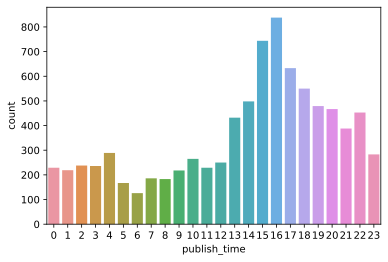

In [13]:
# when is the best time to publish a "trending-wannabe" video?

publish_times = pd.to_datetime(vids['publish_time'], utc=True)
hours = publish_times.apply(lambda x : x.hour)
print(hours.describe())

fig = sbs.countplot(x=hours).get_figure()
fig.savefig('publish_time.svg')

count    8600.000000
mean      305.500000
std       179.598892
min         2.000000
25%       148.000000
50%       299.000000
75%       481.000000
max       684.000000
Name: tags, dtype: float64


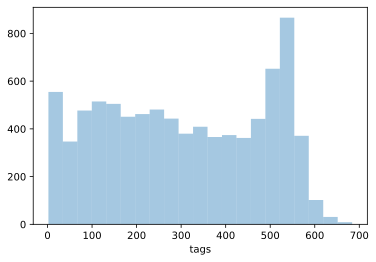

In [16]:
# how does the tags looks like?
tags = vids['tags']
tags = tags.apply(lambda x : len(x))
print(tags.describe())

sbs.distplot(tags, kde=False)

count    8.600000e+03
mean     1.512160e+07
std      1.035667e+08
min     -1.000000e+00
25%      2.315885e+05
50%      1.255834e+06
75%      5.172658e+06
max      4.834097e+09
Name: views, dtype: float64


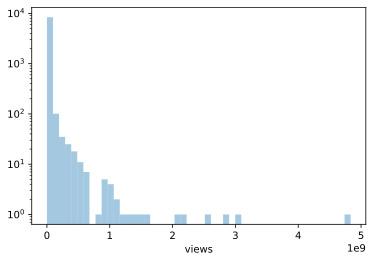

In [17]:
views = vids['views']
print(views.describe())

sbs.distplot(views, kde=False).set_yscale('log')

count    8.600000e+03
mean     8.066067e+03
std      3.330652e+04
min     -1.000000e+00
25%      2.977500e+02
50%      1.345500e+03
75%      4.972250e+03
max      1.423195e+06
Name: comment_count, dtype: float64


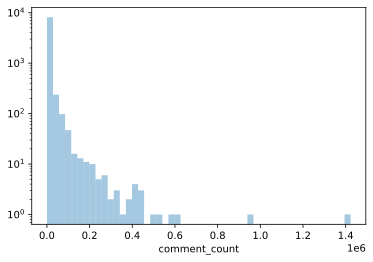

In [19]:
comment_count = vids['comment_count']
print(comment_count.describe())

sbs.distplot(comment_count, kde=False).set_yscale('log')

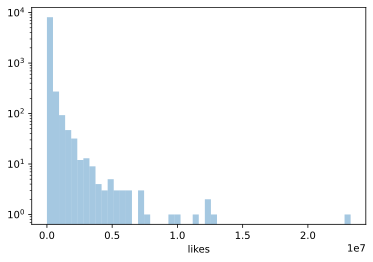

In [21]:
likes = vids['likes']
sbs.distplot(likes, kde=False).set_yscale('log')

count    8.600000e+03
mean     5.141785e+03
std      2.969773e+04
min     -1.000000e+00
25%      1.050000e+02
50%      5.240000e+02
75%      2.232000e+03
max      1.242413e+06
Name: dislikes, dtype: float64


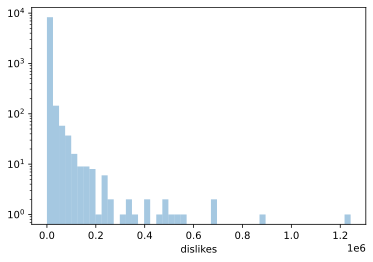

In [22]:
dislikes = vids['dislikes']
print(dislikes.describe())
sbs.distplot(dislikes, kde=False).set_yscale('log')

count    8598.000000
mean        0.045297
std         0.065695
min         0.000000
25%         0.014438
50%         0.026091
75%         0.049113
max         0.695652
dtype: float64
8447    0.695652
5073    0.619048
6720    0.618578
5081    0.616379
4197    0.608074
dtype: float64


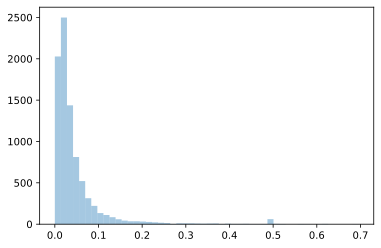

In [23]:
# How big is the like/dislike difference?
difference = dislikes / (likes + dislikes)
print(difference.describe())
print(difference.nlargest())

fig = sbs.distplot(difference, kde=False).get_figure()
fig.savefig('dislikes_to_likes.svg')

count    8600.000000
mean       50.943721
std        19.757645
min         6.000000
25%        36.000000
50%        49.000000
75%        64.000000
max       100.000000
Name: title, dtype: float64


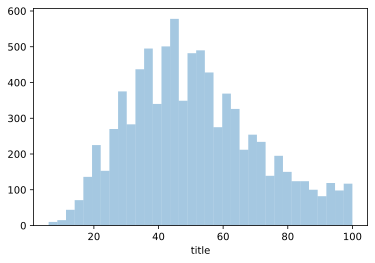

In [24]:
# how long are the titles?
title_num_chars = vids['title'].apply(len)
print(title_num_chars.describe())
sbs.distplot(title_num_chars, kde=False)

# most titles are 30-60 characters long

count    8600.000000
mean        8.873256
std         3.571408
min         1.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        22.000000
Name: title, dtype: float64


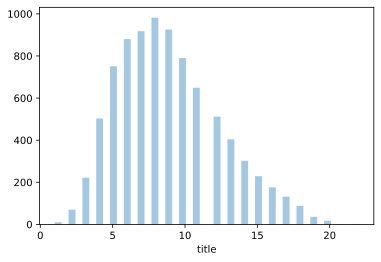

In [25]:
# now let's count words
title_num_words = vids['title'].apply(lambda t: len(t.split(' ')))
print(title_num_words.describe())
sbs.distplot(title_num_words, kde=False)

# a title is typically between 5 and 10 words long

False    8113
True      487
Name: title, dtype: int64


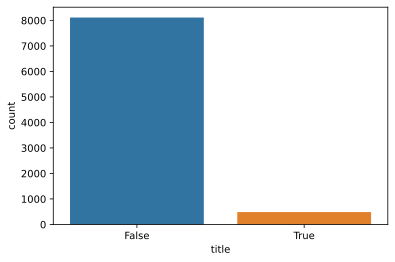

In [26]:
# czy tytuły pisane wielkimi literami występują częściej?

upper_titles = vids['title'].str.isupper()
print(upper_titles.value_counts(dropna=False))

sbs.countplot(x=upper_titles)

# raczej nie

True     7216
False    1249
True      135
Name: description, dtype: int64


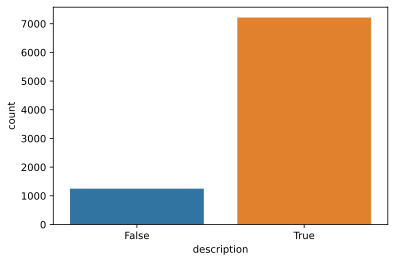

In [27]:
# czy obecność linków w opisie determinuje sukces?

url_keywords = ['http', 'www']
descriptions_with_urls = vids['description'].str.contains('|'.join(url_keywords))

print(descriptions_with_urls.value_counts(dropna=False))
sbs.countplot(x=descriptions_with_urls)

# zdecydowana większość opisów zawiera link

In [28]:
vids['channel_title'].nunique()

2897

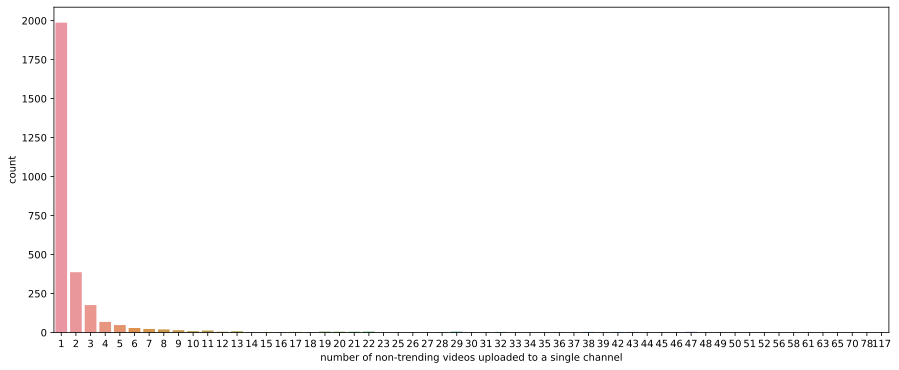

channel_title
ESPN                                      117
The Tonight Show Starring Jimmy Fallon     78
Jimmy Kimmel Live                          70
Mnet K-POP                                 65
The Late Show with Stephen Colbert         65
Epicurious                                 63
NBA                                        61
NFL                                        58
Good Mythical Morning                      56
CinemaSins                                 52
Name: video_id, dtype: int64

In [30]:
counts = vids.groupby('channel_title')['video_id'].nunique()
plt.figure(figsize=(15, 6))
ax = sbs.countplot(counts)
ax.set(xlabel='number of non-trending videos uploaded to a single channel')
plt.show()
counts.nlargest(10)

In [31]:
vids['category_id'].value_counts(dropna=False)

24    2087
10    1342
17     715
22     714
26     692
23     638
25     508
27     404
1      393
20     384
28     337
15     154
19     153
2       49
29      29
44       1
Name: category_id, dtype: int64

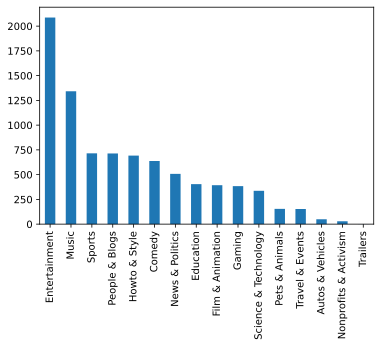

In [41]:
# lots of missing values, but let's decipher those that are given
from loaders import load_categories
categories = load_categories()
counts = vids['category_id'].value_counts()
counts.index = [categories[str(ctg_id)] for ctg_id in counts.index]
counts.plot.bar()
# anyway, we should take it with a grain of salt,
# because most categories are unknown

In [43]:
titles = vids.groupby('video_id').first()[['title']]
titles

,title
video_id,
-1Ahcjs0is0,EVERY DUNK from the 2018 NBA All-Star Game
-1jd4o68_XY,Coldplay sing three very boring songs
-1qeVvWsrA8,Steak Expert Guesses Cheap vs Expensive Steak ...
-28cdRYzR4w,Silent Night - 4-Year-Old Claire Ryann
-3-UgkUOgj8,What the Disney/Fox Merger Means for the MCU
...,...
zxjlNg60ztQ,that kid who would close the classroom door
zxtl5ExJmag,Nicki Minaj - Bed ft. Ariana Grande
zyKjMVyDJx8,The Truth Behind Instagram-Famous Plastic Surg...


In [44]:
import re
from nltk.tokenize.casual import casual_tokenize

def num_chars(text):
    return len(text)

def num_words(text):
    return len(casual_tokenize(text))

def num_uppercase_words(text):
    pattern = r'\b[A-Z]{3,}\b'
    return len(re.findall(pattern, text))

def num_repeated_letters(text):
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    return len(re.findall(pattern, text))

def num_question_marks(text):
    return text.count('?')

def num_exclamation_marks(text):
    return text.count('!')

def num_periods(text):
    return text.count('.')

def num_numbers(text):
    pattern = '\d+'
    return len(re.findall(pattern, text))

def num_hashtags(text):
    pattern = '#\w+'
    return len(re.findall(pattern, text))

features = [
    num_chars, num_words, num_uppercase_words,
    num_question_marks, num_exclamation_marks, num_periods,
    num_numbers, num_hashtags
]

for func in features:
    titles[func.__name__] = titles['title'].apply(func)

In [45]:
(titles['num_uppercase_words'] > 0).sum() / len(titles)

0.3581395348837209

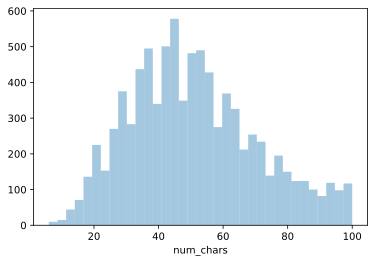

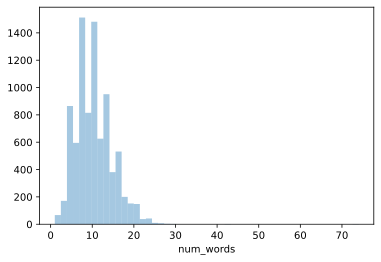

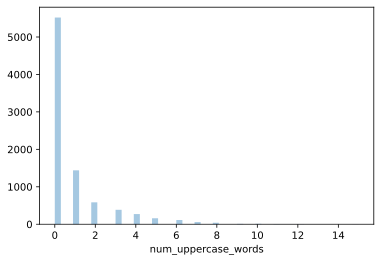

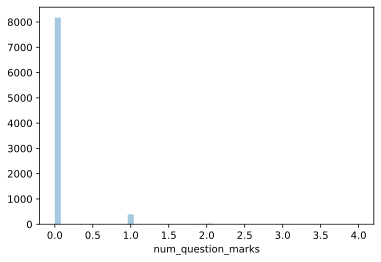

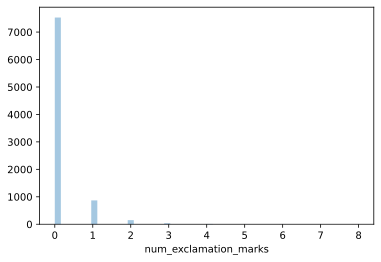

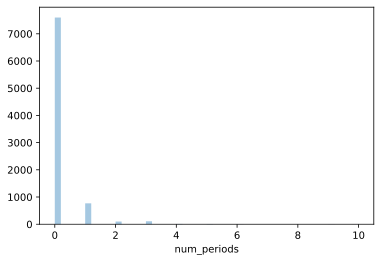

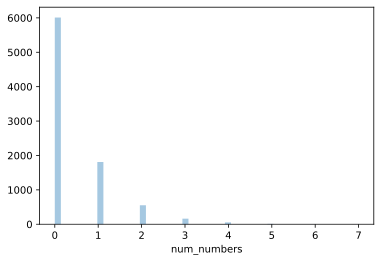

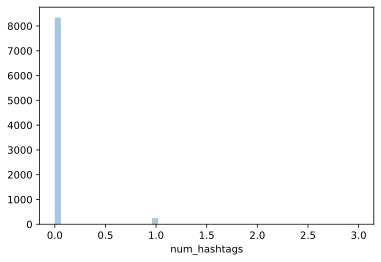

In [47]:
for func in features:
    column = func.__name__
    sbs.distplot(titles[column], kde=False)
    plt.show()

In [48]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import ngrams

stops = set(stopwords.words('english'))
stops.update(string.punctuation)
stemmer = PorterStemmer()

def most_frequent_words(phrases, ngram_size=1, num_most_common=50):
    counter = Counter()
    for phrase in phrases:
        phrase = phrase.lower()
        tokens = casual_tokenize(phrase)
        tokens = [
            stemmer.stem(token)
            for token in tokens
            if token not in stops
        ]
        if ngram_size > 1:
            tokens = ngrams(tokens, ngram_size)
        counter.update(tokens)
    return counter.most_common(num_most_common)

most_frequent_words(titles['title'])

[('offici', 652),
 ('video', 580),
 ('2018', 392),
 ('vs', 294),
 ('music', 278),
 ('trailer', 276),
 ('’', 255),
 ('ft', 219),
 ('best', 212),
 ('live', 206),
 ('new', 203),
 ('star', 202),
 ('game', 201),
 ('first', 199),
 ('2', 197),
 ('make', 176),
 ('1', 164),
 ('5', 158),
 ('movi', 158),
 ('war', 151),
 ('ep', 139),
 ('one', 136),
 ('show', 135),
 ('get', 135),
 ('tri', 134),
 ('10', 133),
 ('got', 131),
 ('challeng', 130),
 ('kid', 130),
 ('full', 129),
 ('talk', 128),
 ('love', 126),
 ('hd', 126),
 ('2017', 125),
 ('life', 125),
 ('diy', 125),
 ('hot', 124),
 ('jame', 124),
 ('3', 119),
 ('play', 119),
 ('stori', 115),
 ('time', 114),
 ('highlight', 113),
 ('take', 113),
 ('day', 112),
 ('trump', 110),
 ('black', 109),
 ('ever', 107),
 ('audio', 107),
 ('top', 106)]

In [49]:
most_frequent_words(titles['title'], 2)

[(('offici', 'video'), 245),
 (('music', 'video'), 167),
 (('offici', 'music'), 147),
 (('offici', 'trailer'), 115),
 (('star', 'war'), 92),
 (('first', 'take'), 75),
 (('lebron', 'jame'), 73),
 (('movi', 'hd'), 71),
 (('trailer', '2018'), 64),
 (('meghan', 'markl'), 62),
 (('far', 'cri'), 60),
 (('got', 'talent'), 56),
 (('grace', 'helbig'), 56),
 (('offici', 'audio'), 56),
 (('cri', '5'), 55),
 (('everyth', 'wrong'), 52),
 (('top', '10'), 51),
 (('princ', 'harri'), 51),
 (('take', 'espn'), 49),
 (('hot', 'one'), 48),
 (('hot', 'wheel'), 47),
 (('spici', 'wing'), 46),
 (('wing', 'hot'), 46),
 (('box', 'fort'), 46),
 (('danc', 'star'), 44),
 (('trailer', '1'), 44),
 (('german', 'shepherd'), 43),
 (('24', 'hour'), 43),
 (('ed', 'sheeran'), 42),
 (('pitch', 'perfect'), 42),
 (('nicki', 'minaj'), 41),
 (('presid', 'trump'), 40),
 (('stage', 'countdown'), 40),
 (('lyric', 'video'), 40),
 (('eat', 'spici'), 38),
 (('comeback', 'stage'), 38),
 (('got', '7'), 38),
 (('grace', 'vanderwa'), 37)

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

def add_sentiment_scores(df, text_column):
    scores = df[text_column].apply(sid.polarity_scores)
    df['sentiment_pos'] = scores.apply(lambda d: d['pos'])
    df['sentiment_neu'] = scores.apply(lambda d: d['neu'])
    df['sentiment_neg'] = scores.apply(lambda d: d['neg'])
    df['sentiment'] = scores.apply(lambda d: d['compound'])
    return df

add_sentiment_scores(titles, 'title');

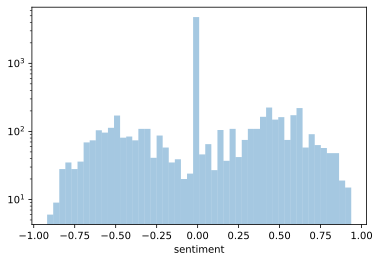

In [52]:
sbs.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

In [53]:
descriptions = pd.DataFrame({ 'description': vids.groupby('video_id').first()['description'].dropna() })

for func in features:
    descriptions[func.__name__] = descriptions['description'].apply(func)

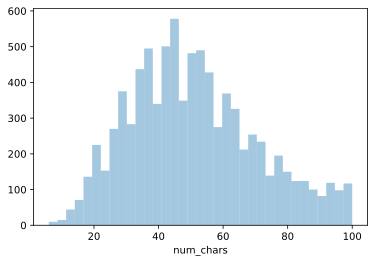

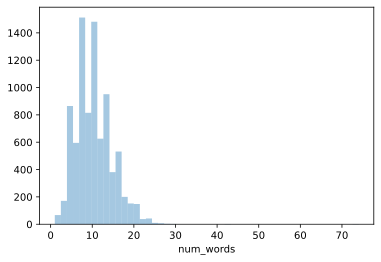

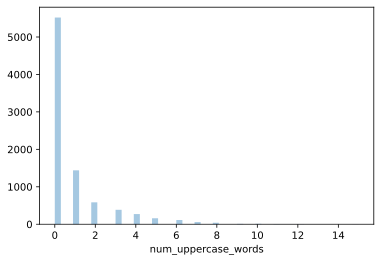

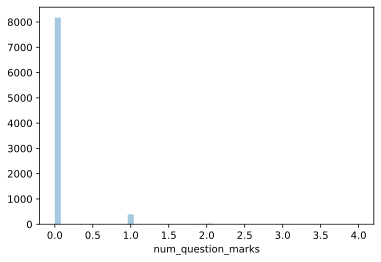

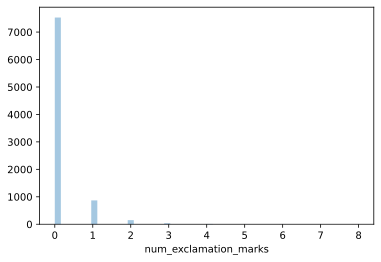

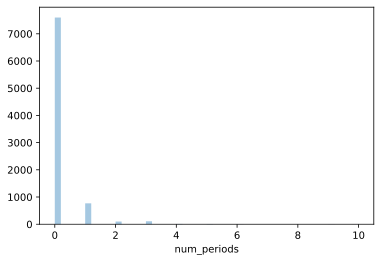

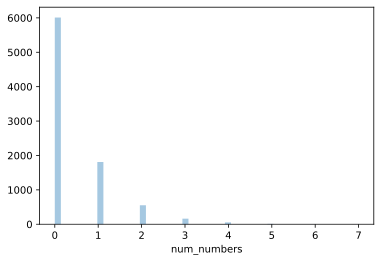

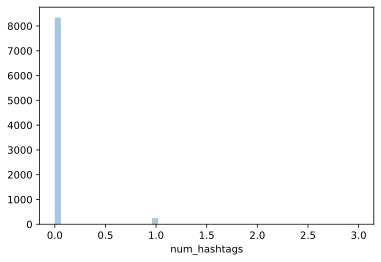

In [55]:
for func in features:
    column = func.__name__
    sbs.distplot(titles[column], kde=False)
    plt.show()

In [56]:
most_frequent_words(descriptions['description'])

[('video', 7666),
 ('follow', 5679),
 ('’', 5610),
 ('subscrib', 4957),
 ('twitter', 4855),
 ('watch', 4648),
 ('instagram', 4469),
 ('►', 4412),
 ('facebook', 4210),
 ('music', 4042),
 ('get', 3751),
 ('like', 3506),
 ('us', 3422),
 ('show', 3208),
 ('new', 2903),
 ('channel', 2689),
 ('youtub', 2576),
 ('use', 2073),
 ('make', 2055),
 ('news', 2001),
 ('one', 1833),
 ('live', 1792),
 ('check', 1791),
 ('offici', 1748),
 ('thank', 1681),
 ('...', 1680),
 ('time', 1659),
 ('love', 1607),
 ('star', 1549),
 ('game', 1537),
 ('jimmi', 1515),
 ('first', 1464),
 ('movi', 1447),
 ('websit', 1439),
 ('find', 1420),
 ('link', 1354),
 ('world', 1352),
 ('see', 1350),
 ('product', 1344),
 ('want', 1342),
 ('▶', 1273),
 ('go', 1256),
 ('best', 1251),
 ('episod', 1217),
 ('late', 1203),
 ('2', 1194),
 ('1', 1194),
 ('2019', 1188),
 ('know', 1156),
 ('film', 1148)]

In [57]:
most_frequent_words(descriptions['description'], 2)

[(('follow', 'us'), 978),
 (('music', 'video'), 780),
 (('late', 'show'), 769),
 (('jimmi', 'kimmel'), 739),
 (('tonight', 'show'), 594),
 (('►', '►'), 585),
 (('kimmel', 'live'), 556),
 (('social', 'media'), 539),
 (('us', 'twitter'), 500),
 (('us', 'facebook'), 494),
 (('espn', 'youtub'), 483),
 (('thank', 'watch'), 473),
 (('youtub', 'channel'), 432),
 (('jimmi', 'fallon'), 423),
 (('box', 'fort'), 416),
 (('follow', 'instagram'), 410),
 (('appl', 'music'), 409),
 (('\xad', '\xad'), 399),
 (('studio', 'c'), 385),
 (('watch', 'full'), 358),
 (('like', 'us'), 349),
 (('star', 'war'), 348),
 (('us', 'instagram'), 347),
 (('►', 'follow'), 339),
 (('watch', 'video'), 333),
 (('follow', 'twitter'), 329),
 (('show', 'star'), 321),
 (('star', 'jimmi'), 318),
 (('offici', 'websit'), 306),
 (('ptx', 'vol'), 292),
 (('follow', 'late'), 282),
 (('watch', 'latest'), 274),
 (('subscrib', 'channel'), 269),
 (('new', 'york'), 262),
 (('youtub', '►'), 257),
 (('full', 'episod'), 257),
 (('googl', 'p

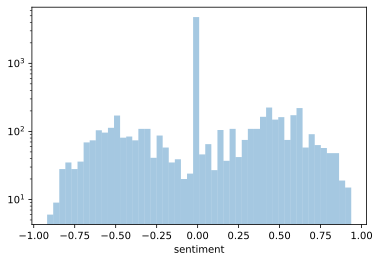

In [59]:
add_sentiment_scores(descriptions, 'description')
sbs.distplot(titles['sentiment'], kde=False)
plt.yscale('log')

In [60]:
most_frequent_words(vids['tags'])


[('video', 2647),
 ('music', 2077),
 ('funni', 1855),
 ('show', 1510),
 ('game', 1449),
 ('news', 1163),
 ('new', 1095),
 ('movi', 1030),
 ('live', 1026),
 ('youtub', 995),
 ('trailer', 988),
 ('best', 974),
 ('interview', 936),
 ('comedi', 931),
 ('food', 907),
 ('star', 893),
 ('2018', 879),
 ('kid', 856),
 ('makeup', 802),
 ('jame', 797),
 ('review', 782),
 ('vs', 772),
 ('make', 762),
 ('celebr', 761),
 ('offici', 734),
 ('highlight', 731),
 ('challeng', 721),
 ('first', 681),
 ('nba', 675),
 ('tv', 658),
 ('5', 654),
 ('war', 642),
 ('vlog', 639),
 ('hot', 631),
 ('anim', 625),
 ('late', 624),
 ('diy', 614),
 ('black', 596),
 ('life', 584),
 ('world', 565),
 ('home', 562),
 ('song', 559),
 ('beauti', 559),
 ('cat', 538),
 ('cri', 536),
 ('hack', 533),
 ('nerf', 524),
 ('dog', 518),
 ('sp', 515),
 ('2', 510)]

# Features

In [61]:
# create a brand new dataframe for hand-crafted features
features = pd.DataFrame(data={'video_id': vids['video_id'], 'category_id': vids['category_id']})
features

,video_id,category_id
0,JKmXamRF9wM,10
1,lp-EO5I60KA,10
2,bIB8EWqCPrQ,10
3,1BR3ycghvTU,26
4,NCJUpiLA8Y0,26
...,...,...
8793,zs4ELJwA5D8,1
8794,5uVkKKxDA6c,1
8795,QYvh1Cr0yII,1
8796,fPi0lnP_u_s,1


In [62]:
publish_times = pd.to_datetime(vids['publish_time'], utc=True)
features['publish_weekday'] = publish_times.apply(lambda x: x.weekday)
features['publish_hour'] = publish_times.apply(lambda x: x.hour)

In [63]:
likes = vids['likes']
dislikes = vids['dislikes']

features['like_ratio'] = likes / (likes + dislikes)
features['likes_per_view'] = likes / vids['views']
features['dislikes_per_view'] = dislikes / vids['views']
features['comments_per_view'] = vids['comment_count'] / vids['views']

In [64]:
import re
from nltk.tokenize.casual import casual_tokenize

def num_chars(text):
    return len(text)

def num_words(text):
    return len(casual_tokenize(text))

def num_uppercase_words(text):
    pattern = r'\b[A-Z]{3,}\b'
    return len(re.findall(pattern, text))

def num_repeated_letters(text):
    pattern = r'\b\w*(\w)\1{2,}\w*\b'
    return len(re.findall(pattern, text))

def num_question_marks(text):
    return text.count('?')

def num_exclamation_marks(text):
    return text.count('!')

def num_periods(text):
    return text.count('.')

def num_numbers(text):
    pattern = '\d+'
    return len(re.findall(pattern, text))

text_features = [
    num_chars, num_words, num_uppercase_words,
    num_question_marks, num_exclamation_marks, num_periods, num_numbers
]

for func in text_features:
    features[f"title_{func.__name__}"] = vids['title'].apply(func)

In [65]:
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import ngrams

stops = set(stopwords.words('english'))
stops.update(string.punctuation)
stemmer = PorterStemmer()


def most_frequent_words(phrases, ngram_size=1, num_most_common=5):
    counter = Counter()
    for phrase in phrases:
        phrase = phrase.lower()
        tokens = casual_tokenize(phrase)
        tokens = [
            stemmer.stem(token)
            for token in tokens
            if token not in stops
        ]
        if ngram_size > 1:
            tokens = ngrams(tokens, ngram_size)
        counter.update(tokens)
    return counter.most_common(num_most_common)

categories = vids['category_id'].dropna().unique()
meaningful_tokens = set()
for ctg in categories:
    titles_in_category = vids[vids['category_id'] == ctg]['title']
    for word, _count in most_frequent_words(titles_in_category):
        if re.match('[a-z0-9]+', word):
            meaningful_tokens.add(word)

for token in meaningful_tokens:
    features[f"title__{token}"] = vids['title'].apply(lambda title: int(token in title.lower()))

In [66]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

features['title_sentiment'] = vids['title'].apply(lambda title: sid.polarity_scores(title)['compound'])

In [67]:
for func in text_features:
    features[f"description_{func.__name__}"] = vids['description'].dropna().apply(func)

In [68]:
features['description_sentiment'] = vids['description'].dropna().apply(lambda desc: sid.polarity_scores(desc)['compound'])

In [69]:
meaningful_tokens = set()
for ctg in categories:
    descriptions_in_category = vids[vids['category_id'] == ctg]['description']
    for word, _count in most_frequent_words(descriptions_in_category.dropna(), 1, 5):
        if re.match('[a-z0-9]+', word) and len(word) > 1 and word != 'video':
            meaningful_tokens.add(word)

for token in meaningful_tokens:
    features[f"description__{token}"] = vids['description'].apply(lambda desc: int(token in str(desc).lower()))

In [70]:
def parse_tags(value):
    if value == '[none]':
        return set()
    return set(tag.strip('"').lower() for tag in value.split('|'))

tags = vids['tags'].apply(parse_tags)
meaningful_tags = set()
for ctg in categories:
    tags_counter = Counter()
    for t in tags[vids['category_id'] == ctg]:
        tags_counter.update(t)
    for word, _count in tags_counter.most_common(4):
        meaningful_tags.add(word)

for tag in meaningful_tags:
    features[f"tag__{tag}"] = tags.apply(lambda tags: int(tag in tags))

In [73]:
import PIL
import cv2
import colorgram
import tqdm.notebook
from loaders import load_thumbnail

tqdm.notebook.tqdm().pandas()

def extract_palette(bgr):
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    img = PIL.Image.fromarray(rgb)
    return colorgram.extract(img, 4)

def hsl_attributes(row):
    try:
        im = load_thumbnail(row['video_id'])
        for i, color in enumerate(extract_palette(im)):
            row[f"h{i}"] = int(color.hsl.h / 255 * 360)
            row[f"s{i}"] = int(color.hsl.s / 255 * 100)
            row[f"l{i}"] = int(color.hsl.l / 255 * 100)
    except TypeError:
        pass
    return row

hsl_zeros = { f"{x}{i}": 0 for i in range(4) for x in ['h', 's', 'l'] }
features = features.assign(**hsl_zeros)
features = features.progress_apply(hsl_attributes, axis=1)

In [74]:
features['has_image'] = (features['h1'] > 0) | (features['h2'] > 0) | (features['s1'] > 0)

In [75]:
face_cascade = cv2.CascadeClassifier('../youtube_data/haarcascade_frontalface_default.xml')

def detect_faces(row):
    if not row['has_image']:
        row['_faces'] = []
    else:
        img = load_thumbnail(row['video_id'])
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.1, 4)
        row['_faces'] = list(faces)
    return row

features = features.progress_apply(detect_faces, axis=1)
features['faces_total'] = features['_faces'].apply(len)

In [76]:
# features = pd.read_csv('../youtube_data/features_non-trending.csv')
features

,video_id,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,...,l1,h2,s2,l2,h3,s3,l3,has_image,_faces,faces_total
0,JKmXamRF9wM,10,4,4,0.952492,0.007430,0.000371,0.000248,46,11,...,85,220,9,46,42,13,63,True,[],0
1,lp-EO5I60KA,10,1,13,0.957880,0.003769,0.000166,0.000105,47,10,...,18,206,16,12,139,11,15,True,[],0
2,bIB8EWqCPrQ,10,4,7,0.974519,0.005121,0.000134,0.000208,49,9,...,41,203,65,77,199,66,73,True,[],0
3,1BR3ycghvTU,26,2,2,0.978044,0.020925,0.000470,0.001477,67,13,...,66,230,37,12,12,26,38,True,"[[79, 12, 35, 35], [10, 9, 36, 36]]",2
4,NCJUpiLA8Y0,26,1,20,0.990336,0.043886,0.000428,0.003710,61,12,...,64,11,54,83,323,33,85,True,[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,zs4ELJwA5D8,1,1,16,0.814644,0.015157,0.003449,0.003147,44,7,...,15,21,23,34,25,23,64,True,[],0
8794,5uVkKKxDA6c,1,3,14,0.959302,0.009898,0.000420,0.001360,63,11,...,6,224,11,6,141,6,34,True,[],0
8795,QYvh1Cr0yII,1,1,15,0.937918,0.012900,0.000854,0.001675,58,11,...,63,159,14,12,199,22,7,True,[],0
8796,fPi0lnP_u_s,1,3,16,0.974387,0.034020,0.000894,0.003149,61,11,...,62,18,38,39,211,55,37,True,[],0


In [77]:
from collections import Counter
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array

classifier = load_model('../youtube_data/model_v6_23.hdf5')
class_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

for label in class_labels.values():
    features[f"faces_{label}"] = 0

def detect_emotions(row):
    if not row['has_image']:
        return row
    
    img = load_thumbnail(row['video_id'])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    rois = []
    for face in row['_faces']:
        (x,y,w,h) = face
        roi_gray = gray[y:y+h, x:x+w]
        
        try:
            roi_gray = cv2.resize(roi_gray, (48, 48), interpolation = cv2.INTER_AREA)
        except:
            roi_gray = np.zeros((48,48), np.uint8)
        
        rois.append(roi_gray)
        
    emotions = Counter()
    for roi in rois:
#         if np.sum([roi]) == 0.0:
#             print("Incorrect ROI for id:" + row['video_id'])
#             continue
        roi = roi.astype("float")
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        
        emotions[label] += 1
    for label, count in emotions.items():
        row[f"faces_{label}"] = count
    
    return row

features = features.progress_apply(detect_emotions, axis=1)

Using TensorFlow backend.


In [78]:
from text_detection import find_text
from scipy import ndimage

features['text_area'] = 0
features['text_centroid_x'], features['text_centroid_y'] = None, None

def boxes_to_bitmap(image, boxes):
    w, h, _ = image.shape
    bitmap = np.zeros((w, h), dtype=bool)
    for (startX, startY, endX, endY) in boxes:
        bitmap[startY:endY, startX:endX] = True
    return bitmap

def detect_text(row):
    if not row['has_image']:
        return row
    img = load_thumbnail(row['video_id'])
    boxes = find_text(img)
    if len(boxes):
        boxes_bmp = boxes_to_bitmap(img, boxes)
        row['text_area'] = boxes_bmp.mean()
        row['text_centroid_x'], row['text_centroid_y'] = ndimage.measurements.center_of_mass(boxes_bmp)
    return row

features = features.progress_apply(detect_text, axis=1)

/usr/local/lib/python3.7/site-packages/scipy/ndimage/measurements.py:1359: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


In [79]:
features = features.drop(columns=['_faces'])
features.to_csv('../youtube_data/features_non-trending.csv')
features

,video_id,category_id,publish_weekday,publish_hour,like_ratio,likes_per_view,dislikes_per_view,comments_per_view,title_num_chars,title_num_words,...,faces_angry,faces_disgust,faces_fear,faces_happy,faces_neutral,faces_sad,faces_surprise,text_area,text_centroid_x,text_centroid_y
0,JKmXamRF9wM,10,4,4,0.952492,0.007430,0.000371,0.000248,46,11,...,0,0,0,0,0,0,0,0.254289,24.000000,65.000000
1,lp-EO5I60KA,10,1,13,0.957880,0.003769,0.000166,0.000105,47,10,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
2,bIB8EWqCPrQ,10,4,7,0.974519,0.005121,0.000134,0.000208,49,9,...,0,0,0,0,0,0,0,0.000000,NaN,NaN
3,1BR3ycghvTU,26,2,2,0.978044,0.020925,0.000470,0.001477,67,13,...,0,0,1,0,0,0,1,0.000000,NaN,NaN
4,NCJUpiLA8Y0,26,1,20,0.990336,0.043886,0.000428,0.003710,61,12,...,0,0,0,0,0,0,0,0.052941,5.500000,19.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8793,zs4ELJwA5D8,1,1,16,0.814644,0.015157,0.003449,0.003147,44,7,...,0,0,0,0,0,0,0,0.340931,40.225377,66.482387
8794,5uVkKKxDA6c,1,3,14,0.959302,0.009898,0.000420,0.001360,63,11,...,0,0,0,0,0,0,0,0.267034,49.134006,53.435980
8795,QYvh1Cr0yII,1,1,15,0.937918,0.012900,0.000854,0.001675,58,11,...,0,0,0,0,0,0,0,0.191176,48.500000,79.500000
8796,fPi0lnP_u_s,1,3,16,0.974387,0.034020,0.000894,0.003149,61,11,...,0,0,0,0,0,0,0,0.281740,37.083950,70.550674


In [88]:
print(features.columns)

Index(['video_id', 'category_id', 'publish_weekday', 'publish_hour',
       'like_ratio', 'likes_per_view', 'dislikes_per_view',
       'comments_per_view', 'title_num_chars', 'title_num_words',
       ...
       'faces_angry', 'faces_disgust', 'faces_fear', 'faces_happy',
       'faces_neutral', 'faces_sad', 'faces_surprise', 'text_area',
       'text_centroid_x', 'text_centroid_y'],
      dtype='object', length=209)
